In [ ]:
yorumları supplier ya da product olarak ayrı ayrı birleştir

promotion_name incele, preprocess? vectorizer?

# runs
1. one-hot encoding, freq encoding, target encoding
2. order hour different intervals

In [ ]:
encodings:
    
Frequency Encoding

Replace the values with its frequency
But be careful, some values may have same frequency
data[‘country’].value_counts()

Target Encoding (Mean encoding)

Each of the categories is the variable is replaced with the mean target value for that category
for each catergory in a column: sum of target / count of target 

In [8]:
data_path = r'C:\Users\IsmailKaraman\workspace\data\trendyol\\'

In [63]:
import pandas as pd
from datetime import datetime

In [10]:
data_products = pd.read_csv(data_path+"products.csv")
data_tra = pd.read_csv(data_path+"transactions.csv")

data_user_dem = pd.read_csv(data_path+"user_demographics.csv")
data_sup_def = pd.read_csv(data_path+"supplier_defective_return.csv")
data_sup_return = pd.read_csv(data_path+"supplier_return.csv")
data_sup_disp = pd.read_csv(data_path+"supplier_disputed_return.csv")

data_reviews = pd.read_csv(data_path+"reviews.csv")
data_qa = pd.read_csv(data_path+"qa.csv")

C:\Users\IsmailKaraman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## data transactions

In [15]:
data_tra.head(2)

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,ship_cost,coupon_id,coupon_discount,promotion_name,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,8.88,NaN,0.0,Sepette %35 İndirim,35.0,0,True,0.0
1,2021-05-01 00:00:01.761000+00:00,3941815,0,163,901280149,595758968,36313798,64622938,129.95,59.97,9.40,NaN,0.0,Sepette %40 İndirim,40.0,0,True,0.0


## data products

In [22]:
data_products.head()

,product_id,product_content_id,product_variant_id,product_name,brand_id,brand_name,gender_id,gender_name,category_id,category_name,color_id,color_name,supplier_color_name,attributet_name,attribute_value
0,86747186,49156804,87148849,3'lü Müslin Örtü Seti - %100 Pamuk Bebek Müsli...,995186,Li Puna,NaN,Unknown,4979,Müslin Bez,NaN,NaN,UNKNOWN,BEDEN,Tek Ebat
1,37159399,44391553,78625630,Haşema Nehar Bakır Çizgili Boru Paça Siyah Tes...,35046,Remsa Mayo,4295.0,Kadın / Kız,2760,Tesettür Mayo,7005.0,Metalik,BAKIR,BEDEN,XL
2,83771873,96708156,161092495,Zincir Fantezi Bel Zinciri-0610,1074023,vonda wear,4295.0,Kadın / Kız,3098,Fantezi Aksesuar,6996.0,Altın,Gold,BEDEN,Tek Ebat
3,66208922,77520098,132019116,Kadın Haki Yeşili Renkli Cerrahi Takım,961534,Moodamedikal,NaN,Unknown,3914,İş Kıyafetleri,NaN,NaN,UNKNOWN,BEDEN,XS
4,68189697,79713829,135202630,Ibıza Uzun Tunik,1021561,Jadeandmate,4295.0,Kadın / Kız,1018,Plaj Elbisesi,6996.0,Altın,Multi,BEDEN,M/L


In [24]:
data_products.shape

(1457567, 15)

## data_user_dem

In [59]:
data_user_dem.head(2)

,user_id,birth_date,membership_date,gender
0,22013146,NaN,2019-05-09 11:11:17.413000+00:00,Bay
1,49707264,NaN,2020-12-19 18:32:16.240000+00:00,Bay


<AxesSubplot:>

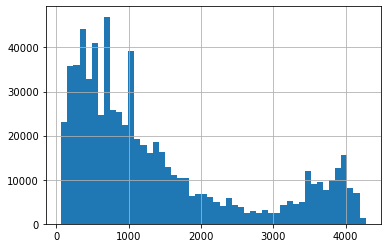

In [72]:
data_user_dem['membership_duration'].hist(bins=50)

<AxesSubplot:>

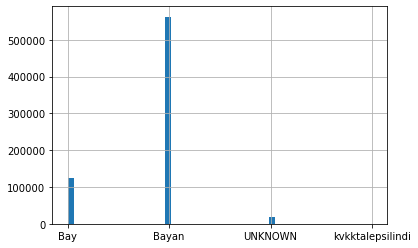

In [74]:
data_user_dem['gender'].hist(bins=50)

## data_sup_def

In [75]:
data_sup_def.head(3)

,supplier_id,returnRate
0,161841,0.0
1,201226,0.0
2,108251,0.0


<AxesSubplot:ylabel='Density'>

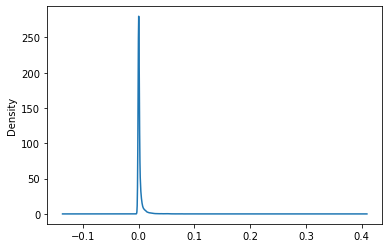

In [95]:
data_sup_def['returnRate'].plot(kind='kde')

## data_sup_return

In [97]:
data_sup_return.head(2)

,supplier_id,returnRate
0,247019,0.0
1,264022,0.0


<AxesSubplot:ylabel='Density'>

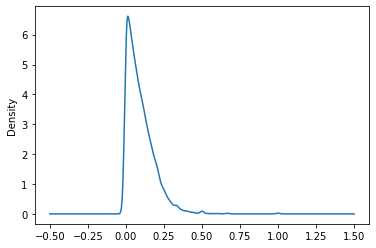

In [98]:
data_sup_return['returnRate'].plot(kind='kde')

In [100]:
data_sup_return.describe()

,supplier_id,returnRate
count,22536.000000,22536.000000
mean,248854.356097,0.096032
std,96391.457295,0.091749
min,62.000000,0.000000
25%,170489.000000,0.027778
50%,243647.500000,0.073961
75%,330740.500000,0.141078
max,434994.000000,1.000000


## data_sup_disp

In [96]:
data_sup_disp.head()

,supplier_id,total_claim,unresolvedclaim_percentage,unresolved_percentage
0,344,164,0.0,0.000000
1,263495,332,0.0,0.000000
2,193158,670,0.0,0.001493
3,146855,86,0.0,0.000000
4,225296,43,0.0,0.000000


In [49]:
# percentage of the unresolved claims
data_sup_disp['unresolved_percentage'] = data_sup_disp['unresolved_claim']/data_sup_disp['total_claim']
# dropping useless columns
data_sup_disp.drop(['unresolved_claim', 'unresolved_accepted_claim'], axis=1, inplace=True)

## merging

In [129]:
tra_prod_df = pd.merge(data_tra, data_products , on=['product_variant_id'], suffixes=('_tra', '_prod'), how='left')
tra_prod_user_df = pd.merge(tra_prod_df, data_user_dem , on=['user_id'], suffixes=(None, '_user_dem'),how='left')

In [130]:
tra_prod_user_df = pd.merge(tra_prod_user_df, data_sup_return , on=['supplier_id'], suffixes=(None,'_sup_return'), how='left')
tra_prod_user_df = pd.merge(tra_prod_user_df, data_sup_def , on=['supplier_id'], suffixes=(None,'_def'), how='left')
df_v1 = pd.merge(tra_prod_user_df, data_sup_disp , on=['supplier_id'], suffixes=(None,'_sup'), how='left')

In [131]:
df_v1.columns

Index(['order_date', 'user_id', 'is_elite_user', 'supplier_id',
       'order_line_item_id', 'order_parent_id', 'product_content_id_tra',
       'product_variant_id', 'original_price', 'discounted_price', 'ship_cost',
       'coupon_id', 'coupon_discount', 'promotion_name',
       'promotion_award_value', 'is_wallet_trx', 'is_saved_card_trx',
       'is_returned', 'product_id', 'product_content_id_prod', 'product_name',
       'brand_id', 'brand_name', 'gender_id', 'gender_name', 'category_id',
       'category_name', 'color_id', 'color_name', 'supplier_color_name',
       'attributet_name', 'attribute_value', 'birth_date', 'membership_date',
       'gender', 'membership_duration', 'returnRate', 'returnRate_def',
       'total_claim', 'unresolvedclaim_percentage', 'unresolved_percentage'],
      dtype='object')

In [132]:
df_v1.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id_tra,product_variant_id,original_price,discounted_price,...,attribute_value,birth_date,membership_date,gender,membership_duration,returnRate,returnRate_def,total_claim,unresolvedclaim_percentage,unresolved_percentage
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,XL,1979-05-24 00:00:00+00:00,2011-04-07 14:55:39.457000+00:00,Bayan,3835,0.098178,0.003045,16357.0,0.328947,0.004646
1,2021-05-01 00:00:01.761000+00:00,3941815,0,163,901280149,595758968,36313798,64622938,129.95,59.97,...,XL,1979-05-24 00:00:00+00:00,2011-04-07 14:55:39.457000+00:00,Bayan,3835,0.050737,0.000545,46699.0,0.000000,0.000000
2,2021-05-01 00:00:01.761000+00:00,3941815,0,157306,901280145,595758968,36888320,65612791,59.99,49.99,...,XL,1979-05-24 00:00:00+00:00,2011-04-07 14:55:39.457000+00:00,Bayan,3835,0.093355,0.000744,902.0,0.777778,0.009978
3,2021-05-01 00:00:01.761000+00:00,3941815,0,163856,901280144,595758968,36888399,65613254,49.90,49.90,...,XL,1979-05-24 00:00:00+00:00,2011-04-07 14:55:39.457000+00:00,Bayan,3835,0.108296,0.000633,227.0,0.200000,0.066079
4,2021-05-01 00:00:02.742000+00:00,15996105,1,968,901279297,595758987,96930601,161408176,89.99,71.99,...,40,1900-01-01 00:00:00+00:00,2018-04-19 19:29:17.410000+00:00,Bayan,1266,0.127110,0.002828,3269293.0,0.000000,0.000000


In [133]:
df_v1.isna().sum()

order_date                           0
user_id                              0
is_elite_user                        0
supplier_id                          0
order_line_item_id                   0
order_parent_id                      0
product_content_id_tra               0
product_variant_id                   0
original_price                       0
discounted_price                     0
ship_cost                        36886
coupon_id                     10433735
coupon_discount                      0
promotion_name                 5653910
promotion_award_value          5653910
is_wallet_trx                        0
is_saved_card_trx                    0
is_returned                     421016
product_id                           0
product_content_id_prod              0
product_name                         0
brand_id                             0
brand_name                           0
gender_id                         7223
gender_name                          0
category_id              

## cleaning outliers, conflicts and nulls

In [264]:
# if promotion award is None, meaning no promotion, then fill it with 0
df_v1['promotion_award_value'].fillna(0.0, inplace=True)

Series([], Name: promotion_award_value, dtype: float64)

In [269]:
# if shipping cost is None, meaning no cost, then fill it with 0
df_v1['ship_cost'].fillna(0.0, inplace=True)

8.880000    1459907
9.400000    1436352
4.700000    1068074
4.440000     854112
3.133333     672929
             ...   
0.893504          1
0.632731          1
1.163556          1
0.402732          1
1.291894          1
Name: ship_cost, Length: 4906, dtype: int64

In [283]:
df_v1['coupon_discount'].value_counts()

 0.00      10433946
-10.00        55156
-25.00        24730
-5.00         18455
-12.50        10977
             ...   
-178.56           1
-163.89           1
-147.90           1
-99.19            1
-114.70           1
Name: coupon_discount, Length: 13079, dtype: int64

In [284]:
disc_df = df_v1[['coupon_discount','original_price', 'discounted_price']].copy()
disc_df

,coupon_discount,original_price,discounted_price
0,0.00,79.90,51.94
1,0.00,129.95,59.97
2,0.00,59.99,49.99
3,0.00,49.90,49.90
4,0.00,89.99,71.99
...,...,...,...
11193672,0.00,129.99,110.49
11193673,-25.00,119.99,119.99
11193674,-5.26,39.99,31.99
11193675,0.00,299.95,299.95


In [ ]:
# paid amount by customer
df_v1['paid_amount'] = df_v1['discounted_price']-df_v1['coupon_discount']+df_v1['ship_cost']

df_v1['discount_ratio'] = (df_v1['original_price']- df_v1['discounted_price'])/df_v1['original_price']

## feature engineering

In [230]:
def day_interval(x):
    if 200 <= x < 1230:
        return 0
    elif 1230 <= x < 1600:
        return 1
    elif 1600 <= x < 1930:
        return 2
    elif 1930 <= x < 2230:
        return 3
    else:
        return 4

<AxesSubplot:xlabel='order_date', ylabel='Count'>

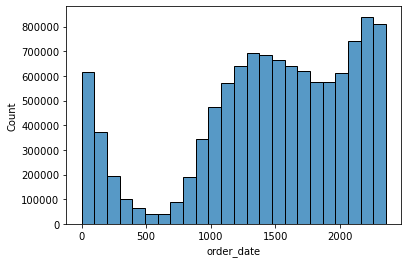

In [259]:
sns.histplot(df_v1["order_date"].apply(lambda x: int(''.join(x.split(' ')[1].split(':',2)[:2]))), bins=24)

In [232]:
# splitting order hour to different intervals
# 02:00 - 12:30 - 0 : midnight and morning
# 12:30 - 16:00 - 1 : noon and afternoon
# 16:00 - 19:30 - 2 : evening and going back to home
# 19:30 - 22:30 - 3 : after dinner, resting time
# 22:30 - 02:00 - 4 : night
df_v1["hour_interval"] = df_v1["order_date"].apply(lambda x: int(''.join(x.split(' ')[1].split(':',2)[:2]))).apply(day_interval)

C:\Users\IsmailKaraman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour_interval', ylabel='count'>

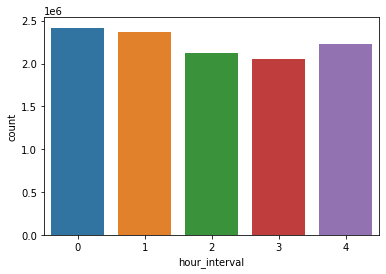

In [234]:
sns.countplot(df_v1["hour_interval"])

In [26]:
1 data_user_dem['order_duration'] = data_user_dem["membership_date"].apply(lambda x: 
                                    (datetime.now() - datetime.strptime(str(x.split(' ')[0]), '%Y-%m-%d')).days)

tra_prod_user_df['order_weekday'] =  pd.to_datetime(tra_prod_user_df['order_date']).dt.weekday

tra_prod_user_df['order_month'] = pd.to_datetime(tra_prod_user_df['order_date']).dt.month

convert_hours = lambda x: datetime(1900, 1, 1, int(x)//100, int(x)%100)

find_hour_difference = lambda x,y : (convert_hours(x)-convert_hours(y)).total_seconds()/60 if not pd.isna(y) else np.nan

tra_prod_user_df["age"] = tra_prod_user_df["birth_date"].apply(lambda x: 2021 - int(x.split('-')[0]))

tra_prod_user_df['date'] = tra_prod_user_df["order_date"].apply(lambda x: int(''.join(x.split(' ')[1].split(':',2)[:2])))
tra_prod_user_df['order_night_interval'] = tra_prod_user_df['date'].apply(pnr_workhour_interval)

,product_content_id,rate,comment,review_like_count,supplier_id
0,35244093,5,75c göğüse S beden aldım spor için daha da sar...,NaN,968
1,97842293,5,fiyatı yüksek ama çok memnunum,NaN,367
2,86701595,5,yorumlara ve beden tablosuna bakarak 1 beden b...,1.0,191874
3,107237246,3,çok kısa iade ettim. sıradan geldi,NaN,968
4,45019480,5,Renkler daha canlı. Hoş,NaN,968
...,...,...,...,...,...
6176836,53600107,4,Çok güzel beğendim 👍,NaN,637
6176837,42373905,1,pamuk değil sentetik.. ve beklediğimiz ürün de...,NaN,142033
6176838,54086523,5,Kışa hazırlık bu fiyata çok iyi aldık. Fakat ş...,NaN,1188
6176839,95633171,3,Ürün fotografta gözüktüğü gibi fakat kalıbı aş...,1.0,968


In [135]:
print('# of unique values: ')
for col in df_v1.columns:
    print(col, ': ', len(df_v1[col].unique()))

# of unique values: 
order_date :  4361897
user_id :  706436
is_elite_user :  2
supplier_id :  22537
order_line_item_id :  11193677
order_parent_id :  4364619
product_content_id_tra :  705613
product_variant_id :  1457567
original_price :  26451
discounted_price :  36719
ship_cost :  4907
coupon_id :  348778
coupon_discount :  13079
promotion_name :  3278
promotion_award_value :  124
is_wallet_trx :  2
is_saved_card_trx :  2
is_returned :  3
product_id :  521401
product_content_id_prod :  705613
product_name :  582378
brand_id :  22677
brand_name :  22677
gender_id :  5
gender_name :  5
category_id :  197
category_name :  197
color_id :  21
color_name :  21
supplier_color_name :  43983
attributet_name :  1
attribute_value :  1217
birth_date :  19619
membership_date :  706384
gender :  4
membership_duration :  4175
returnRate :  10535
returnRate_def :  5152
total_claim :  1627
unresolvedclaim_percentage :  1179
unresolved_percentage :  3858


In [29]:
drop:
user_id
supplier_id
order_line_item_id
order_parent_id
product_content_id_tra
product_content_id_prod
product_variant_id
coupon_id
product_id
product_name
brand_name
promotion_name
gender_name
category_name
color_name
supplier_color_name
attributet_name


order_date : weekday, day of month, month, 
birth_date : horoscope, calculate age
order_date - membership_date : day between order and membership


numerical:   
original_price
discounted_price
ship_cost
coupon_discount
promotion_award_value
returnRate
returnRate_def
total_claim
unresolvedclaim_percentage
unresolved_percentage

categorical:
is_elite_user
is_wallet_trx
is_saved_card_trx
brand_id
gender_id
category_id
color_id
gender
attribute_value
hour_interval

label:
is_returned: none ları dropla

further:
promotion_name
product_name
attribute_value
Add q&a
add reviews

17542

In [147]:
df_v1[['color_id', 'color_name']].corr()

,color_id
color_id,1.0


In [ ]:
df_v1

<AxesSubplot:ylabel='Density'>

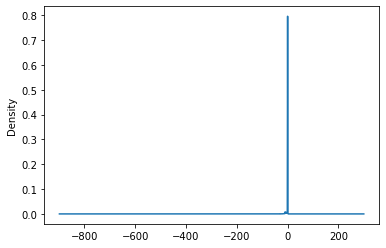

In [166]:
df_v1['coupon_discount'].plot(kind='kde')

In [138]:
for i in df_v1['promotion_name'].unique():
    print(i)

Sepette %35 İndirim
Sepette %40 İndirim
nan
Sepette %20 İndirim
Sepette %50 İndirim
Sepette %60 İndirim
Miniklerin En Sevdikleri - Sepette %10 İndirim
Sepette %30 İndirim
Sepette %25 İndirim
Sepette %15 İndirim
Sepette %7 İndirim
TRENDYOLMİLLA - Elite 2. Ürüne %20 İndirim
Addax - Sepette %10 İndirim
Defacto - Sepette %30 İndirim - Sepette %30 İndirim
Sepette %5 İndirim
Defacto  - Sepette %40 İndirim
Miniklerin En Sevdikleri - Sepette %15 İndirim - Sepette %15 İndirim
Avva - Sepette %50 İndirim
TRENDYOLModest- Elite 2. Ürüne %20 İndirim
50 TL Üzeri %30 İndirim
Erkek Tekstilde - Sepette %7 İndirim
İç Giyimin Favorileri - Sepette %7 İndirim - Sepette %7 İndirim
Sepette %55 İndirim
Tesettür Giyimde Fırsat Zamanı - Sepette %7 İndirim
Kadın Tekstilde Avantajlı Ürünler - Sepette %10 İndirim
Büyük Beden Fırsatları - Sepette %15 İndirim
Erkek Tekstilde - Sepette %10 İndirim
Y-London & Axesoire - Sepette %50 İndirim
2. Ürüne 10 TL İndirim
Kadın Tekstilde Avantajlı Ürünler - Sepette %15 İndirim
T

In [149]:
df_v1['attribute_value']

0           XL
1           XL
2           XL
3           XL
4           40
            ..
11193672    38
11193673    XL
11193674     L
11193675     L
11193676     M
Name: attribute_value, Length: 11193677, dtype: object

In [143]:
sum(df_v1['product_content_id_tra'] != df_v1['product_content_id_prod'])

0

In [155]:
for i in sorted(df_v1['attribute_value'].unique()):
    print(i)

-2
-3
-4
-4,5
0
0 AY
0 REG
0,35 LT
0,43 Lt
0,62LT
0-1 Ay
0-1 Yaş
0-12 Ay
0-12 Yaş
0-18 Ay
0-2 Yaş
0-3 AY
0-3 Yaş
0-4 AY
0-6 Ay
0-6 Yaş
0-9 Ay
00 REG
030x135
090x090
092x092
1
1 Ay
1 M
1 Yaş
1,5 - 2 Yaş
1,5-2,5 Yaş
1-1,5 Yaş
1-2
1-2 AY
1-2 Yaş
1-3 AY
1-3 Yaş
1.5-2 Yaş
1/2
10
10 Yaş
10-11 Yaş
10-12
10-12 Yaş
10-14 Yaş
10/11
10/19
100
100 x 100
100 x 170
100 x 180
100 x 190
100B
100C
100D
100DD
100E
100x100
100x180
1019
104
104 cm
105
105B
105C
105D
10STD
10XL
11
11 Yaş
11-12 Yaş
11-13 Yaş
11-14 Yaş
110
110 CM
110-116 cm
110/116 cm
110B
110C
110D
110x110
112
115
115B
115X115
116
116 cm
12
12 Ay
12 Yaş
12,5
12-13 Ay
12-13 Yaş
12-14
12-14 Yaş
12-15 AY
12-18 AY
12-24 Ay
12/13
12/14
120
120 x 950
120B
120X120
1216
122
122-128 cm
122/128 cm
125
125 CM
125 x 140
128
12H
12M
12STD
13
13 Yaş
13-14
13-14 Yaş
13-15 Yaş
130 x 70
132
134-140 cm
134/140
14
14 Yaş
14 Yaş ve üzeri
14-15 Yaş
14-16 Yaş
14/15
140
140 CM
140 x 70
140-146 cm
140x140
146
146-152 cm
146/152
15
15 Ay
15 YAŞ
15-16
15-16 Yaş
15-1

['-2',
 '-3',
 '-4',
 '-4,5',
 '0',
 '0 AY',
 '0 REG',
 '0,35 LT',
 '0,43 Lt',
 '0,62LT',
 '0-1 Ay',
 '0-1 Yaş',
 '0-12 Ay',
 '0-12 Yaş',
 '0-18 Ay',
 '0-2 Yaş',
 '0-3 AY',
 '0-3 Yaş',
 '0-4 AY',
 '0-6 Ay',
 '0-6 Yaş',
 '0-9 Ay',
 '00 REG',
 '030x135',
 '090x090',
 '092x092',
 '1',
 '1 Ay',
 '1 M',
 '1 Yaş',
 '1,5 - 2 Yaş',
 '1,5-2,5 Yaş',
 '1-1,5 Yaş',
 '1-2',
 '1-2 AY',
 '1-2 Yaş',
 '1-3 AY',
 '1-3 Yaş',
 '1.5-2 Yaş',
 '1/2',
 '10',
 '10 Yaş',
 '10-11 Yaş',
 '10-12',
 '10-12 Yaş',
 '10-14 Yaş',
 '10/11',
 '10/19',
 '100',
 '100 x 100',
 '100 x 170',
 '100 x 180',
 '100 x 190',
 '100B',
 '100C',
 '100D',
 '100DD',
 '100E',
 '100x100',
 '100x180',
 '1019',
 '104',
 '104 cm',
 '105',
 '105B',
 '105C',
 '105D',
 '10STD',
 '10XL',
 '11',
 '11 Yaş',
 '11-12 Yaş',
 '11-13 Yaş',
 '11-14 Yaş',
 '110',
 '110 CM',
 '110-116 cm',
 '110/116 cm',
 '110B',
 '110C',
 '110D',
 '110x110',
 '112',
 '115',
 '115B',
 '115X115',
 '116',
 '116 cm',
 '12',
 '12 Ay',
 '12 Yaş',
 '12,5',
 '12-13 Ay',
 '12-13 